<a href="https://colab.research.google.com/github/Jiasha-nath/Soil-Moisture-Prediction/blob/main/soil_moisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
dataset = pd.read_csv('soil-moisture-dataset.csv')
dataset.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2024,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2024,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2024,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2024,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2024,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False


In [ ]:
dataset.shape

(1000, 12)

In [ ]:
dataset.isnull().sum()

year         0
month        0
day          0
hour         0
minute       0
second       0
moisture0    0
moisture1    0
moisture2    0
moisture3    0
moisture4    0
irrgation    0
dtype: int64

In [ ]:
dataset["year"].value_counts()

year
2020    1000
Name: count, dtype: int64

In [ ]:
dataset["month"].value_counts()

month
3    1000
Name: count, dtype: int64

In [ ]:
dataset["irrgation"].value_counts()

irrgation
False    1000
Name: count, dtype: int64

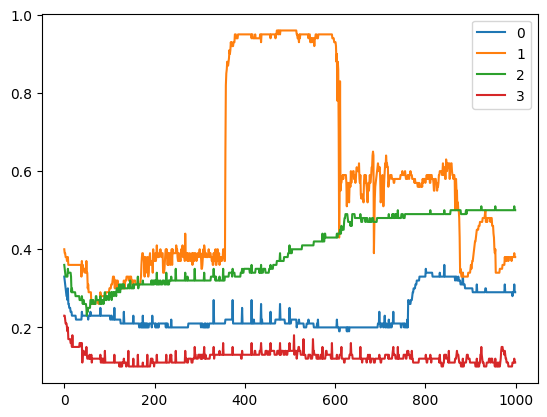

In [ ]:
plt.figure()
plt.plot(dataset["moisture0"])
plt.plot(dataset["moisture1"])
plt.plot(dataset["moisture2"])
plt.plot(dataset["moisture3"])
plt.legend(["0", "1", "2", "3"])
plt.show()

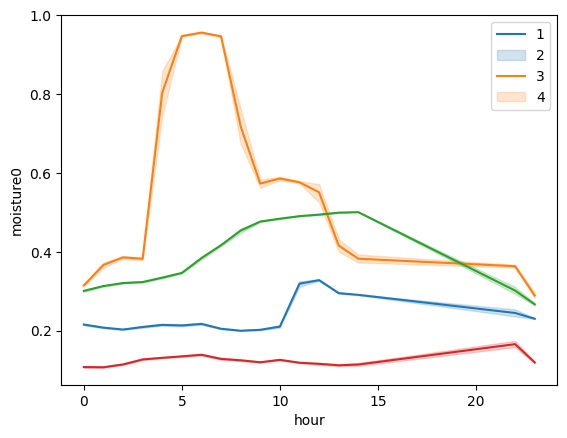

In [ ]:
plt.figure()
sns.lineplot(data=dataset, x="hour", y="moisture0")
sns.lineplot(data=dataset, x="hour", y="moisture1")
sns.lineplot(data=dataset, x="hour", y="moisture2")
sns.lineplot(data=dataset, x="hour", y="moisture3")
plt.legend(["1", "2", "3", "4"])
plt.show()

In [ ]:
X = dataset.drop("moisture4", axis=1)
y = dataset["moisture4"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
r2_score(y_test, y_pred)

0.6351118401260882